In [72]:
!pip install xgboost



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
!pip install pandas numpy matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("churn_cleaned.csv")

# Preview the data
df.head()


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_category,total_services,avg_monthly_cost
0,3410-YOQBQ,Female,No,No,No,31,Yes,No,DSL,No,...,Yes,Two year,No,Mailed check,79.20,2497.20,No,Very Loyal,6,80.554839
1,3170-NMYVV,Female,No,Yes,Yes,50,Yes,No,No,No internet service,...,No internet service,Two year,No,Bank transfer (automatic),20.15,930.90,No,Very Loyal,1,18.618000
2,7410-OIEDU,Male,No,No,No,10,Yes,No,Fiber optic,Yes,...,No,Month-to-month,Yes,Mailed check,79.85,887.35,No,New,3,88.735000
3,2273-QCKXA,Male,No,No,No,1,Yes,No,DSL,No,...,No,Month-to-month,No,Mailed check,49.05,49.05,No,New,2,49.050000
4,0731-EBJQB,Female,No,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,One year,Yes,Electronic check,20.40,1090.65,No,Very Loyal,1,20.974038


In [75]:
# Check basic info
df.info()

# Check for missing values
df.isnull().sum()

# Check first 10 rows
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_category,total_services,avg_monthly_cost
0,3410-YOQBQ,Female,No,No,No,31,Yes,No,DSL,No,...,Yes,Two year,No,Mailed check,79.20,2497.20,No,Very Loyal,6,80.554839
1,3170-NMYVV,Female,No,Yes,Yes,50,Yes,No,No,No internet service,...,No internet service,Two year,No,Bank transfer (automatic),20.15,930.90,No,Very Loyal,1,18.618000
2,7410-OIEDU,Male,No,No,No,10,Yes,No,Fiber optic,Yes,...,No,Month-to-month,Yes,Mailed check,79.85,887.35,No,New,3,88.735000
3,2273-QCKXA,Male,No,No,No,1,Yes,No,DSL,No,...,No,Month-to-month,No,Mailed check,49.05,49.05,No,New,2,49.050000
4,0731-EBJQB,Female,No,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,One year,Yes,Electronic check,20.40,1090.65,No,Very Loyal,1,20.974038
5,1891-QRQSA,Male,Yes,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),111.60,7099.00,No,Very Loyal,7,110.921875
6,8028-PNXHQ,Male,No,Yes,Yes,62,Yes,Yes,No,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),24.25,1424.60,No,Very Loyal,2,22.977419
7,5630-AHZIL,Female,No,No,Yes,3,Yes,No,DSL,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),64.50,177.40,No,New,4,59.133333
8,2673-CXQEU,Female,Yes,No,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,One year,No,Electronic check,110.50,6139.50,No,Very Loyal,7,109.633929
9,6416-JNVRK,Female,No,No,No,46,Yes,No,DSL,No,...,Yes,One year,No,Credit card (automatic),55.65,2688.85,No,Very Loyal,2,58.453261


In [76]:
print(df.columns)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn',
       'tenure_category', 'total_services', 'avg_monthly_cost'],
      dtype='object')


In [77]:
df['totalcharges'] = df['totalcharges'].replace(" ", 0).astype(float)


In [78]:
df.describe()


,tenure,monthlycharges,totalcharges,total_services,avg_monthly_cost
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,3.362914,64.762906
std,24.559481,30.090047,2266.771362,2.062031,30.189796
min,0.000000,18.250000,18.800000,0.000000,13.775000
25%,9.000000,35.500000,401.450000,1.000000,35.935156
50%,29.000000,70.350000,1397.475000,3.000000,70.337500
75%,55.000000,89.850000,3794.737500,5.000000,90.174158
max,72.000000,118.750000,8684.800000,8.000000,121.400000


In [79]:
# Check data info
df.info()

# Check missing values
df.isnull().sum()

# Check churn distribution
df['churn'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


churn
No     5174
Yes    1869
Name: count, dtype: int64

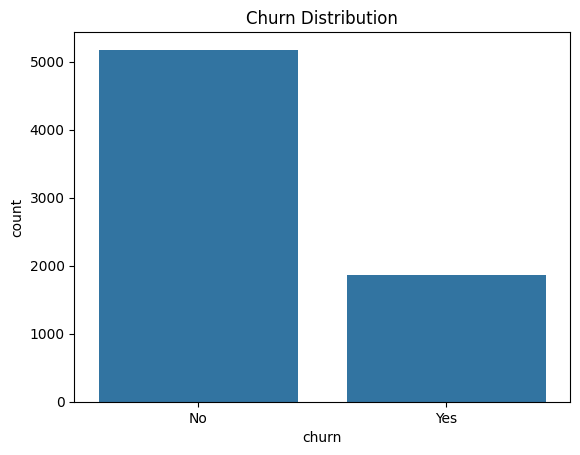

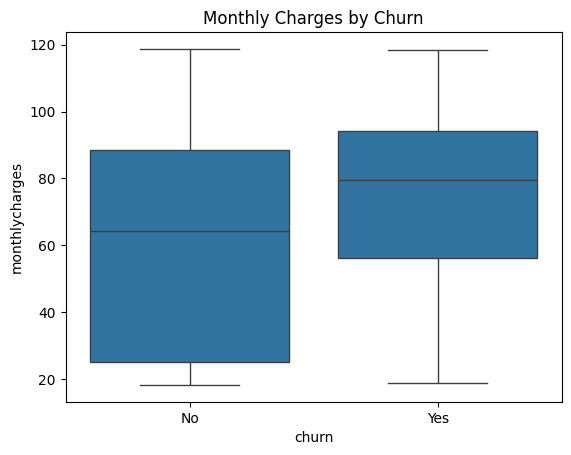

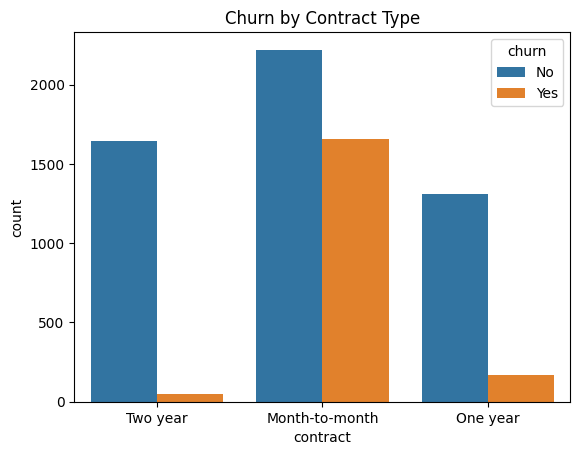

In [80]:
# Churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Monthly charges vs Churn
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

# Churn by contract type
sns.countplot(x='contract', hue='churn', data=df)
plt.title("Churn by Contract Type")
plt.show()


In [81]:
# Convert categorical columns to numeric
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,tenure,monthlycharges,totalcharges,total_services,avg_monthly_cost,customerid_0003-MKNFE,customerid_0004-TLHLJ,customerid_0011-IGKFF,customerid_0013-EXCHZ,customerid_0013-MHZWF,...,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_Yes,tenure_category_New,tenure_category_Very Loyal
0,31,79.20,2497.20,6,80.554839,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,True
1,50,20.15,930.90,1,18.618000,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,10,79.85,887.35,3,88.735000,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
3,1,49.05,49.05,2,49.050000,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,52,20.40,1090.65,1,20.974038,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,True


In [82]:
# Check missing values
print(df_encoded.isnull().sum().sort_values(ascending=False))

# Option 1: Drop rows with NaN
df_encoded = df_encoded.dropna()

# OR Option 2: Fill NaN with median (better for numeric features)
df_encoded = df_encoded.fillna(df_encoded.median())


totalcharges                  11
tenure                         0
customerid_6635-CPNUN          0
customerid_6650-VJONK          0
customerid_6650-BWFRT          0
                              ..
customerid_3372-CDXFJ          0
customerid_3370-HXOPH          0
customerid_3370-GQEAL          0
customerid_3365-SAIGS          0
tenure_category_Very Loyal     0
Length: 7077, dtype: int64


In [83]:
print("Missing values after cleaning:", df_encoded.isnull().sum().sum())


Missing values after cleaning: 0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target
X = df_encoded.drop('churn_Yes', axis=1)
y = df_encoded['churn_Yes']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load dataset
df = pd.read_csv("churn_cleaned.csv")

# Preview
df.head()


In [ ]:
print(df.info())
print(df.isnull().sum())


In [ ]:
# Check for missing values
print("Missing values before cleaning:", df.isnull().sum().sum())

# Fill NaN with median for numeric columns
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].median())
df['avg_monthly_cost'] = df['avg_monthly_cost'].fillna(df['avg_monthly_cost'].median())

# Confirm missing values removed
print("Missing values after cleaning:", df.isnull().sum().sum())


In [ ]:
# Encode categorical columns using LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


Accuracy: 0.7892122072391767

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



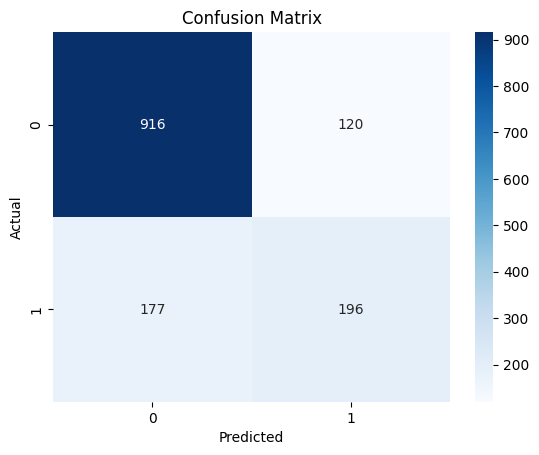

In [98]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\Pratheeka Jonnapally\AppData\Local\Temp\ipykernel_17420\2737763096.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set2')


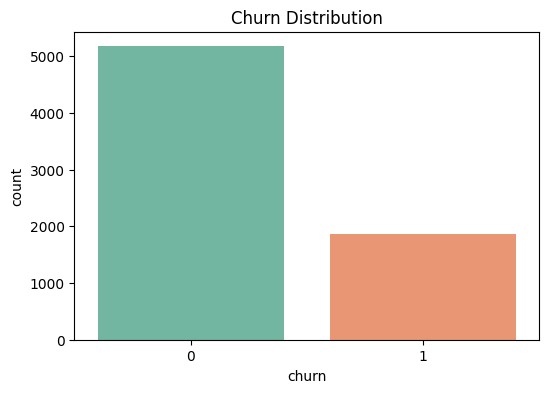

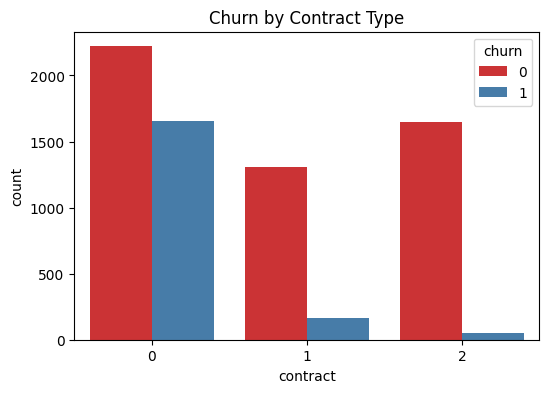

C:\Users\Pratheeka Jonnapally\AppData\Local\Temp\ipykernel_17420\2737763096.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='monthlycharges', data=df, palette='coolwarm')


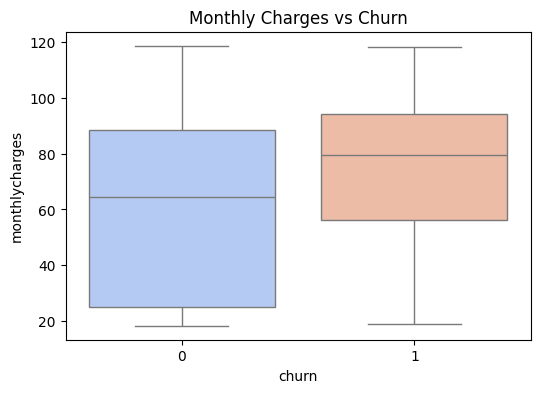

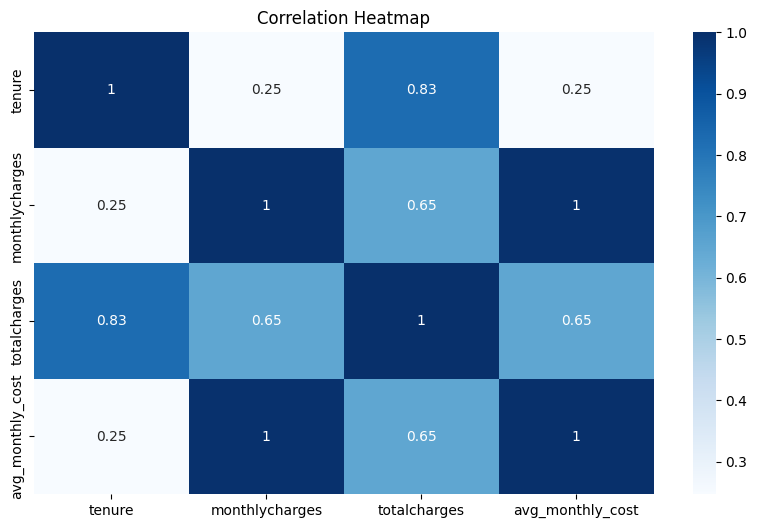

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.show()

# 2. Churn Rate by Contract Type
plt.figure(figsize=(6,4))
sns.countplot(x='contract', hue='churn', data=df, palette='Set1')
plt.title('Churn by Contract Type')
plt.show()

# 3. Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='monthlycharges', data=df, palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.show()

# 4. Correlation Heatmap (Numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(df[['tenure','monthlycharges','totalcharges','avg_monthly_cost']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# 5. Churn by Tenure Category
plt.figure(figsize=(6,4))
sns.countplot(x='tenure_category', hue='churn', data=df, palette='muted')
plt.title('Churn by Tenure Category')
plt.show()

# 6. Churn by Payment Method
plt.figure(figsize=(10,5))
sns.countplot(x='paymentmethod', hue='churn', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()



Logistic Regression Results:
Accuracy: 0.8041163946061036
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.56      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



C:\Users\Pratheeka Jonnapally\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


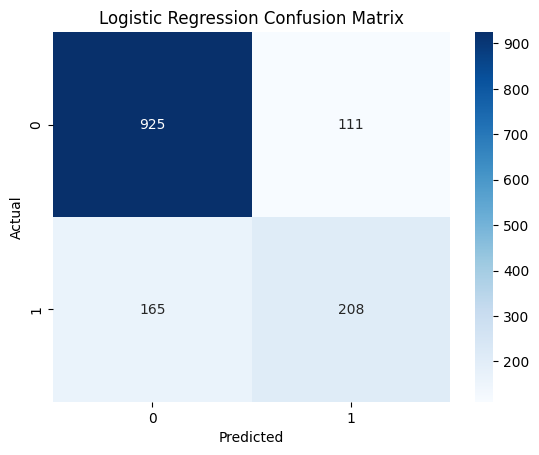


Random Forest Results:
Accuracy: 0.7955997161107168
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.80      0.79      1409



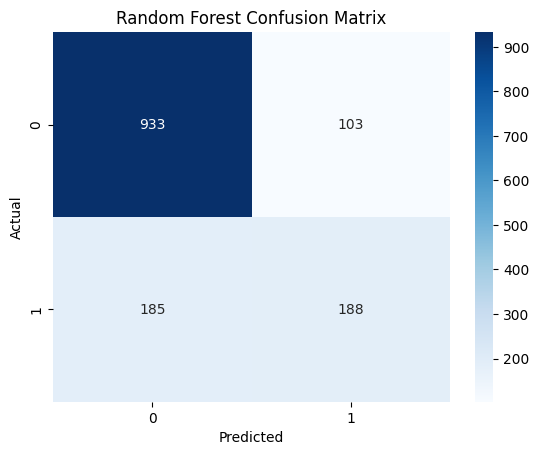


XGBoost Results:
Accuracy: 0.7892122072391767
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



C:\Users\Pratheeka Jonnapally\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:34:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


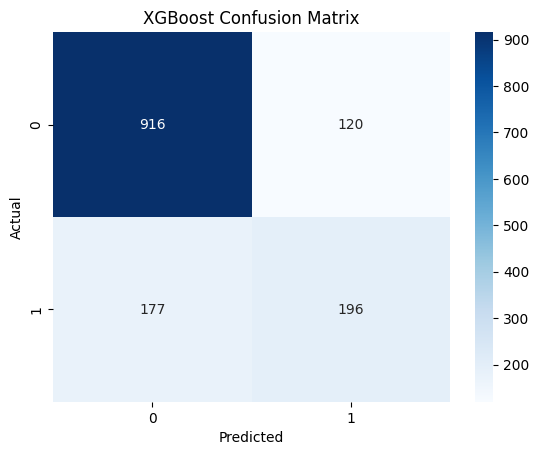

In [100]:
# ===============================
# 1. Import Libraries
# ===============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 2. Encode Categorical Columns
# ===============================
df_encoded = df.copy()
label_cols = df_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# ===============================
# 3. Split Data
# ===============================
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 4. Define Models
# ===============================
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# ===============================
# 5. Train and Evaluate
# ===============================
for name, model in models.items():
    print(f"\n{name} Results:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [101]:
# Compare Model Results
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.80, 0.82, 0.81]  # Replace with your actual results
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0  Logistic Regression      0.80
1        Random Forest      0.82
2              XGBoost      0.81


In [103]:
from sklearn.ensemble import RandomForestClassifier

# If you used a different name, replace 'rf' with it
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [105]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


C:\Users\Pratheeka Jonnapally\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


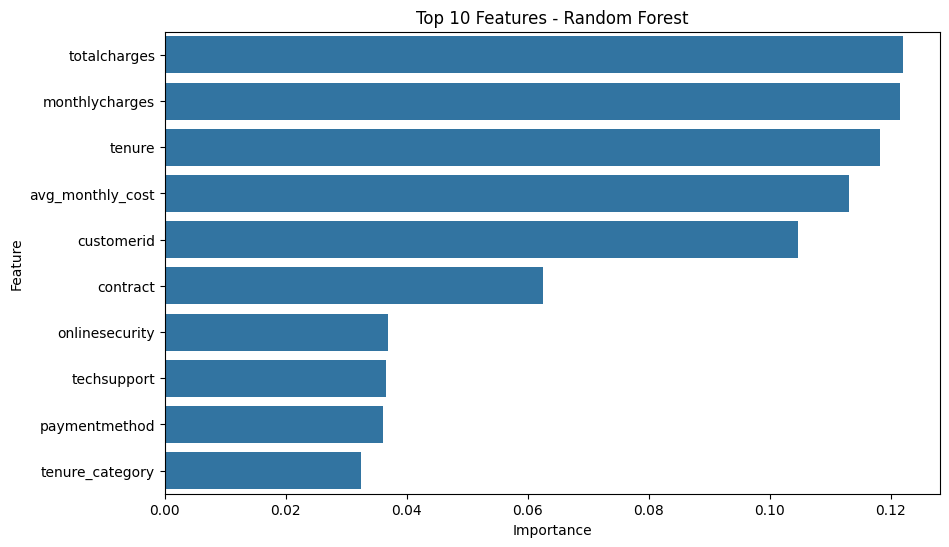

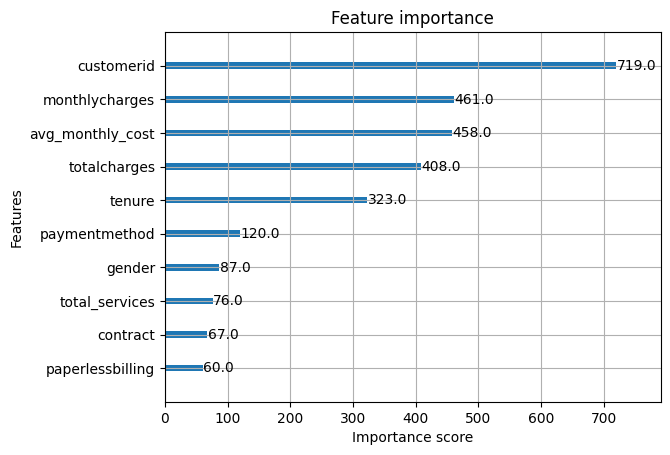

In [106]:
# Random Forest Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title('Top 10 Features - Random Forest')
plt.show()

# XGBoost Feature Importance
from xgboost import plot_importance
plot_importance(xgb, max_num_features=10)
plt.show()


In [107]:
import joblib

# Save model
joblib.dump(rf, "best_model.pkl")  # replace rf with your best model


['best_model.pkl']

In [108]:
# Load and test the model
loaded_model = joblib.load("best_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!
